Assumptions if ordinary Least Squares [Gauss-Markov assumption]
    1. Linearity : if your relationship is not linear, you have to male it linear first
    2. Absence of multicollinearity (features must be independant or almost independant)
    3. Homoscedasticity: constant variance
    4. Exogeneity of errors and Xs:
        * Residuals are independant from features
        * E(epsilon)=0 constant variance(eps)
        * Residuals should be kinda normal
    5. No autocorrelation: there should not be any correlation among rows

Way to check these assumptions 

    1. Linearity:
        * Vizualisation 
        * Pearson correlation coefficient 
    2. Absence of multicollinearity
        * Variance inflation factor : if there is a at least 1 VIF > 10 --> Multicollinearity
    3. Homoscedasticity : 
        * Breusch-Pagan test
        * White test
    4. Exogeneity of errors and Xs: 
        * Jarque-Bera test of Normality / QQplat / Histogram of residuals

In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('/Users/etienneleconte/Downloads/housing_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


So, based on the previous 2 tables:
* we have 43 object columns, that be converted into numeric 
* we have a lot of columns with a bunch of missing value 
* Mansonry Veneer Area wa have 50% of data 0 (corresponds to no MsnrVnsr)
* Same situation for Pool and Porch. Lots of houses simply don't have it
* Outliers in LotFrontage - with an average being at 70, there a house with 313ft 
* Same with LotArea. 10K on avg, max at 215K + Avg is above median ands almost equal to 75% --> data is highly skewed 
* The oldest is 1872, newest 2010 - YearRemodAdd oldest is 1950 telling us that the oldest house has actually been remodeled
* The last sale wad made in 2010 indicating the year of the dataset. And in terms of prices we have a potential outlier given that the 75% is 214K and max 755K 

In [6]:
df.Id.nunique()==df.shape[0]

True

In [7]:
df.drop('Id', axis=1, inplace=True)

In [8]:
df.sample()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
244,60,RL,NaN,8880,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,205000


In [9]:
na=df.isna().sum()
(na[na>0]/df.shape[0]*100).round()

LotFrontage      18.0
Alley            94.0
MasVnrType        1.0
MasVnrArea        1.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinType2      3.0
Electrical        0.0
FireplaceQu      47.0
GarageType        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
PoolQC          100.0
Fence            81.0
MiscFeature      96.0
dtype: float64

In [10]:
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [11]:
NA_dummies=[]
dummies=[]

In [12]:
NA_dummies.append('MiscFeature')

In [13]:
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [14]:
import numpy as np 

df['Privacy']=np.where(df.Fence=='MnPrv',1,0)
df['Privacy']=np.where(df.Fence=='GdPrv',2,df['Privacy'])

In [15]:
df.Privacy.value_counts()

0    1244
1     157
2      59
Name: Privacy, dtype: int64

In [16]:
df['Wood']=np.where(df.Fence=='MnWw',1,0)
df['Wood']=np.where(df.Fence=='GdWo',2,df['Wood'])

In [17]:
df.Wood.value_counts()

0    1395
2      54
1      11
Name: Wood, dtype: int64

In [18]:
drop_cols=['Fence']

In [19]:
df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [20]:
dct={'Ex':5,'Gd':4,'TA':3, 'Fa':2, 'Po':1}

In [21]:
df.PoolQC=df.PoolQC.map(dct).fillna(0)

In [22]:
df.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [23]:
df.GarageQual=df.GarageQual.map(dct).fillna(0)

In [24]:
df.GarageCond=df.GarageCond.map(dct).fillna(0)

In [25]:
df.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [26]:
NA_dummies.append('GarageType')

In [27]:
drop_cols.append('GarageYrBlt')

In [28]:
df.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [29]:
dct_gar={'RFn':2,'Unf':1,'Fin':3}

In [30]:
df.GarageFinish=df.GarageFinish.map(dct_gar).fillna(0)

In [31]:
df.FireplaceQu=df.FireplaceQu.map(dct).fillna(0)

In [32]:
df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [33]:
df.groupby('Electrical').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
Electrical,,,,,,,,
FuseA,94.0,122196.893617,37511.376615,34900.0,98500.0,121250.0,143531.25,239000.0
FuseF,27.0,107675.444444,30636.507376,39300.0,88500.0,115000.0,129950.00,169500.0
FuseP,3.0,97333.333333,34645.827070,73000.0,77500.0,82000.0,109500.00,137000.0
Mix,1.0,67000.000000,NaN,67000.0,67000.0,67000.0,67000.00,67000.0
SBrkr,1334.0,186825.113193,79856.458326,37900.0,134575.0,170000.0,220750.00,755000.0


In [34]:
drop_cols.append('Electrical')

LotFrontage      18.0
Alley            94.0
MasVnrType        1.0
MasVnrArea        1.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinType2      3.0

In [35]:
df.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [36]:
dct_bsmtype={'GLQ':5, 'ALQ':4, 'Unf':1, 'Rec':2.5, 'BLQ':3, 'LwQ':2}

In [37]:
df.BsmtFinType1=df.BsmtFinType1.map(dct_bsmtype).fillna(0)

In [38]:
df.BsmtFinType2=df.BsmtFinType2.map(dct_bsmtype).fillna(0)

In [39]:
df.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [40]:
dct_bsmtExp={'No':1, 'Gd':4, 'Mn':2, 'Av':3}

In [41]:
df.BsmtExposure=df.BsmtExposure.map(dct_bsmtExp).fillna(0)

In [42]:
df.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [43]:
df.BsmtCond=df.BsmtCond.map(dct).fillna(0)

In [44]:
df.BsmtQual=df.BsmtQual.map(dct).fillna(0)

In [45]:
df.MasVnrArea=df.MasVnrArea.fillna(0)

In [46]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [47]:
df.MasVnrType.fillna('None',inplace=True)

In [48]:
dummies.append('MasVnrType')

In [49]:
drop_cols.append('Alley')

In [50]:
df.LotFrontage=df.LotFrontage.fillna(0)

In [51]:
na=df.isna().sum()
na[na>0]

Alley          1369
Electrical        1
GarageType       81
GarageYrBlt      81
Fence          1179
MiscFeature    1406
dtype: int64

In [52]:
df.drop(drop_cols,axis=1,inplace=True)

In [53]:
drop_cols=[]

In [54]:
df.shape

(1460, 78)

In [55]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Privacy,Wood
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,NaN,0,2,2008,WD,Normal,208500,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,NaN,0,5,2007,WD,Normal,181500,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,NaN,0,9,2008,WD,Normal,223500,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,NaN,0,2,2006,WD,Abnorml,140000,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,NaN,0,12,2008,WD,Normal,250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,NaN,0,8,2007,WD,Normal,175000,0,0
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,NaN,0,2,2010,WD,Normal,210000,1,0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,Shed,2500,5,2010,WD,Normal,266500,2,0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,NaN,0,4,2010,WD,Normal,142125,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [57]:
df.columns[~df.columns.isin(df._get_numeric_data().columns)]

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [58]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [59]:
dummies.append('MSZoning')

In [60]:
df.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [61]:
dummies.append('Street')

In [62]:
df.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [63]:
dct_lotshape={'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}

In [64]:
def test(x,df=df):
    return df.groupby(x).SalePrice.describe()

In [65]:
test('LotShape')

,count,mean,std,min,25%,50%,75%,max
LotShape,,,,,,,,
IR1,484.0,206101.665289,85858.489559,52000.0,150000.0,189000.0,239000.0,755000.0
IR2,41.0,239833.365854,99669.427362,110000.0,175000.0,221000.0,250000.0,538000.0
IR3,10.0,216036.500000,82540.334855,73000.0,167875.0,203570.0,265000.0,375000.0
Reg,925.0,164754.818378,69673.427215,34900.0,120000.0,146000.0,188000.0,582933.0


In [66]:
df.LotShape=df.LotShape.map(dct_lotshape)

In [67]:
df.LandContour.unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [68]:
test('LandContour')

,count,mean,std,min,25%,50%,75%,max
LandContour,,,,,,,,
Bnk,63.0,143104.079365,49361.244074,52500.0,113000.0,139400.0,171250.00,315000.0
HLS,50.0,231533.940000,101790.139741,82500.0,151750.0,222250.0,281347.25,538000.0
Low,36.0,203661.111111,83935.353620,39300.0,143000.0,190000.0,263750.00,385000.0
Lvl,1311.0,180183.746758,78463.567918,34900.0,130000.0,162900.0,212000.00,755000.0


In [69]:
dummies.append("LandContour")

In [70]:
df.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [71]:
test('Utilities')

,count,mean,std,min,25%,50%,75%,max
Utilities,,,,,,,,
AllPub,1459.0,180950.95682,79461.599814,34900.0,129950.0,163000.0,214000.0,755000.0
NoSeWa,1.0,137500.00000,NaN,137500.0,137500.0,137500.0,137500.0,137500.0


In [72]:
qqq=df.loc[df.Utilities=='NoSeWa']

In [73]:
import matplotlib.pyplot as plt 

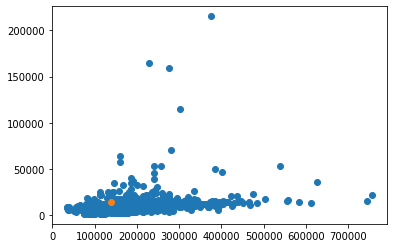

In [74]:
plt.scatter(df.SalePrice, df.LotArea)
plt.scatter(qqq.SalePrice, qqq.LotArea)


In [75]:
# Not an outlier : lets drop it 
drop_cols.append('Utilities')

In [76]:
df.columns[~df.columns.isin(df._get_numeric_data().columns)]

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'GarageType',
       'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [77]:
df.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [78]:
dummies.append('LotConfig')

In [79]:
df.LandSlope.unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [80]:
test('LandSlope')

,count,mean,std,min,25%,50%,75%,max
LandSlope,,,,,,,,
Gtl,1382.0,179956.799566,78669.369151,34900.0,129900.0,161875.0,212000.0,755000.0
Mod,65.0,196734.138462,92375.358116,39300.0,130000.0,186700.0,259500.0,538000.0
Sev,13.0,204379.230769,86729.922409,61000.0,143000.0,185000.0,260000.0,375000.0


In [81]:
df.LandSlope=df.LandSlope.map({'Gtl':0, 'Mod':1, 'Sev':2})

In [82]:
df.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [83]:
dummies.append('Neighborhood')

In [84]:
df.Condition1.unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [85]:
df.Condition2.unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [86]:
conditions=(df.Condition1+' '+df.Condition2).str.get_dummies(sep=' ')

In [87]:
df[['Condition '+i for i in conditions.columns]]=conditions

In [88]:
drop_cols.extend(['Condition1','Condition2'])

In [89]:
df.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [90]:
dummies.append('BldgType')

In [91]:
df.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [92]:
drop_cols.append('HouseStyle')

In [93]:
df.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [94]:
test('RoofStyle')

,count,mean,std,min,25%,50%,75%,max
RoofStyle,,,,,,,,
Flat,13.0,194690.000000,62522.963515,82000.0,143000.0,185000.0,242000.0,274970.0
Gable,1141.0,171483.956179,66331.237296,34900.0,128000.0,160000.0,202500.0,755000.0
Gambrel,11.0,148909.090909,67013.527807,40000.0,105500.0,139000.0,193750.0,259500.0
Hip,286.0,218876.933566,111549.603563,55000.0,139675.0,176500.0,277875.0,745000.0
Mansard,7.0,180568.428571,58057.624627,100000.0,145500.0,175000.0,216000.0,265979.0
Shed,2.0,225000.000000,49497.474683,190000.0,207500.0,225000.0,242500.0,260000.0


In [95]:
drop_cols.append('RoofStyle')

In [96]:
drop_cols.append('RoofMatl')

In [97]:
df.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [98]:
df.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [99]:
df.columns[~df.columns.isin(df._get_numeric_data().columns)]

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'Functional', 'GarageType', 'PavedDrive',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [100]:
exterior=(df.Exterior1st+' '+df.Exterior2nd).str.get_dummies(sep=' ')
df[['Exterior '+i for i in exterior.columns]]=exterior
drop_cols.extend(['Exterior1st','Exterior2nd'])

In [101]:
dummies.append('MasVnrType')

In [102]:
df.ExterQual=df.ExterQual.map(dct)

In [103]:
df.ExterCond=df.ExterCond.map(dct)

In [104]:
dummies.append('Foundation')

In [105]:
drop_cols.append('Heating')

In [106]:
df.HeatingQC=df.HeatingQC.map(dct)

In [107]:
df.CentralAir=df.CentralAir.map({'Y':1,'N':0})

In [108]:
df.KitchenQual=df.KitchenQual.map(dct)

In [109]:
df.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [110]:
df.Functional=df.Functional.map({'Typ':0, 'Min1':1, 'Maj1':4, 'Min2':2, 'Mod':3, 'Maj2':5, 'Sev':6})

In [111]:
df.PavedDrive=df.PavedDrive.map({'Y':1,'N':0})

In [112]:
drop_cols.append('SaleType')

In [113]:
drop_cols.append('SaleCondition')

In [114]:
df.drop(drop_cols,axis=1,inplace=True)

In [115]:
NA_dummies

['MiscFeature', 'GarageType']

In [120]:
df1=pd.get_dummies(data=df, columns=NA_dummies)
df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,60,RL,65.0,8450,Pave,0,Lvl,Inside,0,CollgCr,...,0,0,0,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Pave,0,Lvl,FR2,0,Veenker,...,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,Pave,1,Lvl,Inside,0,CollgCr,...,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,Pave,1,Lvl,Corner,0,Crawfor,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,Pave,1,Lvl,FR2,0,NoRidge,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,0,Lvl,Inside,0,Gilbert,...,0,0,0,0,0,1,0,0,0,0
1456,20,RL,85.0,13175,Pave,0,Lvl,Inside,0,NWAmes,...,0,0,0,0,0,1,0,0,0,0
1457,70,RL,66.0,9042,Pave,0,Lvl,Inside,0,Crawfor,...,0,0,1,0,0,1,0,0,0,0
1458,20,RL,68.0,9717,Pave,0,Lvl,Inside,0,NAmes,...,0,0,0,0,0,1,0,0,0,0


In [121]:
df2=pd.get_dummies(data=df1, columns=dummies, drop_first=True)
df2

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,65.0,8450,0,0,7,5,2003,2003,196.0,...,0,0,1,0,0,0,1,0,0,0
1,20,80.0,9600,0,0,6,8,1976,1976,0.0,...,0,0,0,1,0,1,0,0,0,0
2,60,68.0,11250,1,0,7,5,2001,2002,162.0,...,0,0,1,0,0,0,1,0,0,0
3,70,60.0,9550,1,0,7,5,1915,1970,0.0,...,0,0,0,1,0,0,0,0,0,0
4,60,84.0,14260,1,0,8,5,2000,2000,350.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,0,0,6,5,1999,2000,0.0,...,0,0,0,1,0,0,1,0,0,0
1456,20,85.0,13175,0,0,6,6,1978,1988,119.0,...,0,0,0,0,1,1,0,0,0,0
1457,70,66.0,9042,0,0,7,9,1941,2006,0.0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,0,0,5,6,1950,1996,0.0,...,0,0,0,1,0,1,0,0,0,0


In [122]:
df2.drop('MSSubClass',axis=1,inplace=True)

In [123]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 147 entries, LotFrontage to Foundation_Wood
dtypes: float64(13), int64(73), uint8(61)
memory usage: 1.0 MB


In [125]:
df2.columns[~df2.columns.isin(df2._get_numeric_data().columns)]

Index([], dtype='object')

In [126]:
df2['PriceSF']=df2.SalePrice/df2.LotArea

In [128]:
df2.drop('SalePrice',axis=1,inplace=True)

## Modeling

In [130]:
from statsmodels.formula.api import ols
from statsmodels.api import OLS

In [ ]:
ols('PriceSF ~ LotArea', data=df2)